In [1]:
from LTSpice_Simulator import get_Spice_Arrays
from Wavefront_Generation import Full_Cycle
import Wavefront_Plotting as WP
import Wavefront_Interactive as WI
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
input_values ={
    'L_time':'13',
    'C_time':'7',
    'L_impedance':'200',
    'show_about':False,
    # 'Load_impedance': '10'
}

interface = Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))

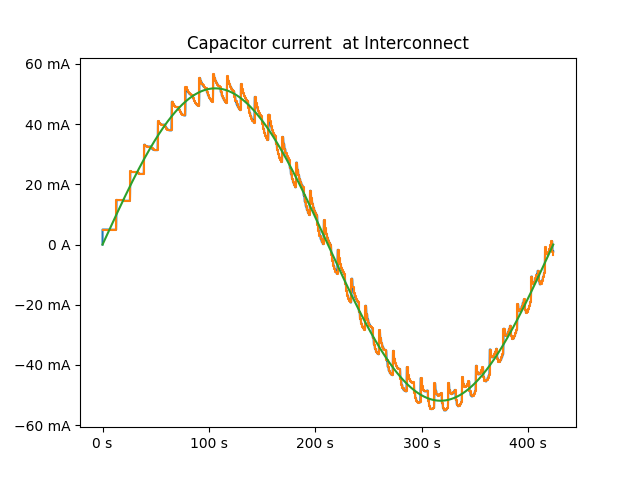

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['Time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['Time'],LTSpice_outputs['Capacitor_Current_Circuit'])

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=422.8240202016044)

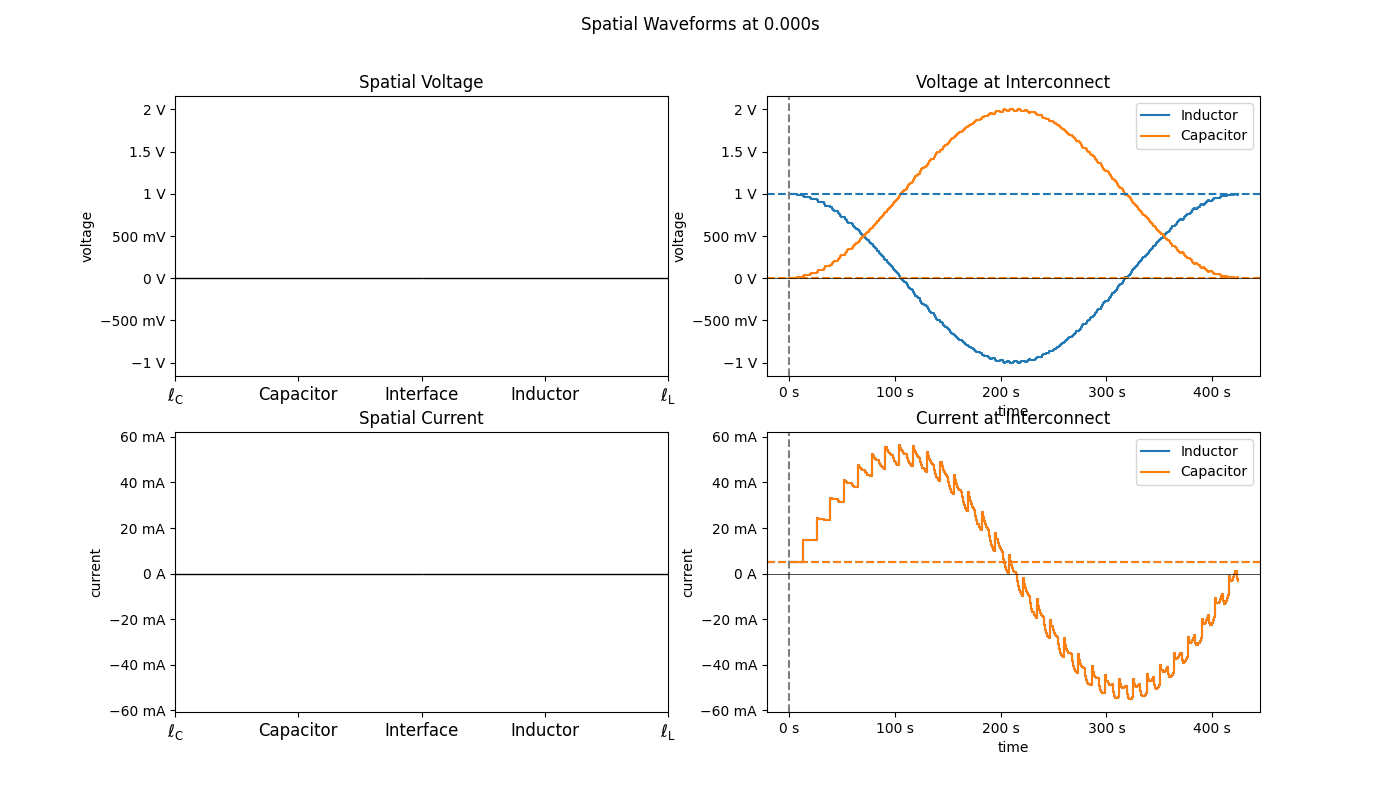

In [4]:
WI.spatial_interconnect_investigator_ui(interface)

In [5]:
from decimal import Decimal
from matplotlib.ticker import (MultipleLocator, EngFormatter)

In [9]:
Z = Decimal('50')
R = Decimal('1000')
RS = Decimal('20')
V = Decimal('1')

VO = V*(Z/(RS+Z))
IO = VO/Z

VO_lossless = V
IO_lossless = V/Z

Ref_Source = (RS-Z)/(RS + Z)
Ref_Source_lossless = Decimal('-1')
Ref_Load = (R-Z)/(R+Z)

number_K = 60
delta_T = Decimal('0.000000005')

VR = Decimal('0') 
IR = Decimal('0')
VR_lossless = Decimal('0') 
IR_lossless = Decimal('0')
T = Decimal('0')

V_out =[]
I_out =[]
V_out_lossless =[]
I_out_lossless =[]
T_out =[]

V_out.append(VR)
I_out.append(IR)
V_out_lossless.append(VR_lossless)
I_out_lossless.append(IR_lossless)
T_out.append(T)

for n in range(1,number_K):
    T+=delta_T
    
    VR_new = VO*Ref_Source**(n-1)*(Ref_Load**(n-1) + Ref_Load**(n))
    VR += VR_new
    
    IR_new = IO*Ref_Source**(n-1)*(Ref_Load**(n-1) - Ref_Load**(n))
    IR += IR_new
    
    VR_new_lossless = VO_lossless*Ref_Source_lossless**(n-1)*(Ref_Load**(n-1) + Ref_Load**(n))
    VR_lossless += VR_new_lossless
    
    IR_new_lossless = IO_lossless*Ref_Source_lossless**(n-1)*(Ref_Load**(n-1) - Ref_Load**(n))
    IR_lossless += IR_new_lossless
    
    V_out.append(VR)
    I_out.append(IR)
    V_out_lossless.append(VR_lossless)
    I_out_lossless.append(IR_lossless)
    T_out.append(T)
    
    # print(f"{n} : VR : {VR}")
    # print(f"{n} : IR : {IR}")

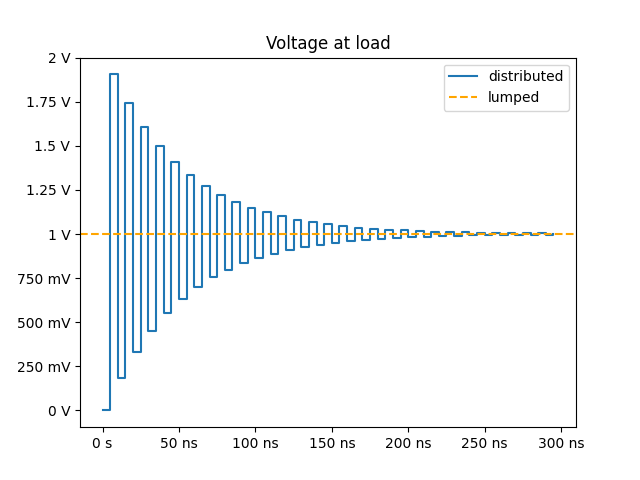

In [10]:
# fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots()

# ax[0].step(T_out,V_out,where='post')
ax.step(T_out,V_out_lossless,where='post')
ax.yaxis.set_major_formatter(EngFormatter('V'))
ax.xaxis.set_major_formatter(EngFormatter('s'))
ax.axhline(y = 1,linestyle='--',label='Circuit',c='orange')

ax.set_title("Voltage at load")
ax.legend(['distributed','lumped'])

# # ax[1].step(T_out,I_out,where='post')
# ax[1].step(T_out,I_out_lossless,where='post')
# ax[1].yaxis.set_major_formatter(EngFormatter('A'))
# ax[1].xaxis.set_major_formatter(EngFormatter('s'))

